<a href="https://colab.research.google.com/github/ooinoing/DL/blob/main/mnist_718.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 막..code


## Module 

In [1]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 680 kB/s 
     |████████████████████████████████| 61 kB 8.9 MB/s 
     |████████████████████████████████| 9.9 MB 36.5 MB/s 
     |████████████████████████████████| 15.7 MB 41.2 MB/s 
     |████████████████████████████████| 11.2 MB 42.4 MB/s 
     |████████████████████████████████| 944 kB 51.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

In [2]:
!pip install matplotlib==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 3.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires matplotlib!=3.0.0,>=2.0.2, but you have matplotlib 3.0.0 which is incompatible.
scikit-image 0.18.3 requires matplotlib!=3.0.0,>=2.0.0, but you have matplotlib 3.0.0 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.0 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.0 which is incompatible.
d2l 0.17.5 requires matplotlib==3.5.1, but you have matplotlib 3.0.0 which is incompatible.
albu

## 3.5 The Image Classification Dataset


In [4]:
%matplotlib inline  
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게

import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
torch.manual_seed(17)

d2l.use_svg_display()

### 3.5.1 Reading the Dataset

In [6]:
"""
trans = transforms.ToTensor()   

mnist_train = torchvision.datasets.MNIST(root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.MNIST(root="../data", train=False, transform=trans, download=True)

"""
# ToTensor converts the image data from PIL type to 32-bit floating point tensors. It divides all numbers by 255 so that all pixel values are between 0 and 1
# download를 True로 했을때 데이터셋을 인터넷에서 다운로드
# 이렇게 로드를 하면 PIL.Image.Image 타입의 오브젝트가 데이터로 들어감 이것을 torch.Tensor 타입으로 바꾸려면 transform 인자로, torchvision.transforms.toTensor()를 넣어주면 된다.


'\ntrans = transforms.ToTensor()   \n\nmnist_train = torchvision.datasets.MNIST(root="../data", train=True, transform=trans, download=True)\nmnist_test = torchvision.datasets.MNIST(root="../data", train=False, transform=trans, download=True)\n\n'

In [7]:
#len(mnist_train), len(mnist_test)

In [8]:
#type(mnist_train[0][0]) , mnist_train[0][0].shape , type(mnist_train[0][1])
# train dataset은 600개의 행 (observation) , 각 행은 [0] : 28*28짜리 텐서로 변환된 이미지, [1] : 라벨값인 int
# Input : PIL Image / Tensor Image (Channel,Height,Width) / batch of Tensor Images  (Batch,Channel,Height,Width)

In [9]:
# visualizing function
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.0): 
  """Plot a list of images."""
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):  # Tensor Image
      ax.imshow(img.numpy())
    else: # PIL Image
      ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
  return axes


In [10]:
"""
X,y = next(iter(data.DataLoader(mnist_train, batch_size=20)))
show_images(X.reshape(20,28,28),2,10, titles = y.tolist() )
"""

'\nX,y = next(iter(data.DataLoader(mnist_train, batch_size=20)))\nshow_images(X.reshape(20,28,28),2,10, titles = y.tolist() )\n'

### 3.5.2 Reading a Minibatch

at each iteration, a data iterator reads a minibatch of data with size batch_size each time. We also randomly shuffle the examples for the
training data iterator.


In [11]:
'''
batch_size = 256
num_workers = 4
# num_workers는 현재 작업하고 있는 환경 내에서 어떤 프로세스에 데이터를 불러올 것인지 조정하는 파라미터입니다.
# 0이 Default값이며, 0은 Main Process에 데이터를 불러오는 것을 의미합니다.
# 만약 Multi-Processing을 이용해서 데이터를 로드할 경우 Process의 개수에 맞게 할당하여 인자값을 조절하기도 합니다.

train_iter = data.DataLoader(mnist_train, batch_size = batch_size, shuffle = True, num_workers=num_workers)
'''


'\nbatch_size = 256\nnum_workers = 4\n# num_workers는 현재 작업하고 있는 환경 내에서 어떤 프로세스에 데이터를 불러올 것인지 조정하는 파라미터입니다.\n# 0이 Default값이며, 0은 Main Process에 데이터를 불러오는 것을 의미합니다.\n# 만약 Multi-Processing을 이용해서 데이터를 로드할 경우 Process의 개수에 맞게 할당하여 인자값을 조절하기도 합니다.\n\ntrain_iter = data.DataLoader(mnist_train, batch_size = batch_size, shuffle = True, num_workers=num_workers)\n'

### 3.5.3 Putting all things together

In [12]:
def load_data_mnist(batch_size, resize = None):
  """Download the MNIST dataset and ten load it to memory"""
  trans = [transforms.ToTensor()] # list of transform objects - transforms.CenterCrop(10) 이런거 추가해도 됨
  if resize : 
    trans.insert(0, transforms.Resize(resize))

  trans = transforms.Compose(trans) # torchvision.transforms.Compose(list of Transform objects)

  mnist_train = torchvision.datasets.MNIST(root = "../data", train=True, transform = trans, download=True)
  mnist_test = torchvision.datasets.MNIST(root = "../data", train=False, transform = trans, download=True)

  train_loader = torch.utils.data.DataLoader(mnist_train, batch_size, shuffle = True, num_workers = 2 )
  test_loader = torch.utils.data.DataLoader(mnist_test, batch_size, shuffle = False, num_workers = 2 )
  return train_loader, test_loader

In [13]:
train_iter, test_iter = load_data_mnist(256,resize=28)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [21]:
for X,y in train_iter:
  print(X.shape , X.dtype, y.shape, y.dtype)
  break

torch.Size([256, 1, 28, 28]) torch.float32 torch.Size([256]) torch.int64


## 3.6 Implementation of Softmax Regression from scratch

### 3.6.1 Initailizing Model Parameters

we will flatten each image,
treating them as vectors of length 784.(28*28)
for now we treat each pixel location as just another feature.


In [22]:
input_dim = 784
output_dim = 10

W = torch.normal(0, 0.01, size=(input_dim,output_dim), requires_grad= True )  #텐서의 모든 연산에 대하여 추적을 시작
b = torch.zeros(output_dim, requires_grad= True)

In [23]:
W.shape, b.shape

(torch.Size([784, 10]), torch.Size([10]))

### 3.6.2 Defining the Softmax Operation

In [15]:
#sum 함수 작동 방식 이해해보자는 그런 코두ㅡ
'''
X = torch.tensor([[1. ,2. ,3. ],[4. ,5. ,6. ]])
X.sum(0, keepdim= True), X.sum(1,keepdim = True)
'''

(tensor([[5., 7., 9.]]), tensor([[ 6.],
         [15.]]))

In [24]:
def softmax(X_ij):
    X_ij_exp = torch.exp(X_ij)
    partition = X_ij_exp.sum(1, keepdim=True) # axis 1 : 같은 행끼리 합 
    return X_ij_exp / partition  

In [25]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.3364, 0.1042, 0.1153, 0.2137, 0.2304],
         [0.0952, 0.0230, 0.6515, 0.0187, 0.2115]]), tensor([1.0000, 1.0000]))

### 3.6.3 Defining the Model

In [26]:
def net(X):
  logit = torch.matmul(X.reshape((-1, W.shape[0])), W) + b  # 행은 자동, 열만 W.shape[0]으로 지정
  return softmax(logit)  


### 3.6.4 Defining the Loss Function

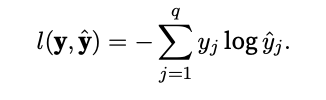


In [31]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])  # predicted probabilities of each class
y_hat[[0, 1], y]

# Using y as the indices of the probabilities in y_hat
# we pick the probability of the first class in the first example = (0,1) 
# and the probability of the third class in the second example. = ()

tensor([0.1000, 0.5000])

In [32]:
# y_hat

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])

In [35]:
def cross_entropy(y_hat, y):
  res = y_hat[range(len(y_hat)), y]
  return - torch.log( res )


cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

### 3.6.5 Classification Accuracy

In [27]:
def accuracy(y_hat, y):  
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [28]:
accuracy(y_hat, y) / len(y)

0.5

In [30]:
def evaluate_accuracy(net, data_iter):  
    """Compute the accuracy for a model on a dataset."""
    if isinstance(net, torch.nn.Module):
        net.eval()  # Set the model to evaluation mode
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [32]:
class Accumulator: 
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

In [33]:
evaluate_accuracy(net, test_iter)

0.0994

### 3.6.6 Training

In [ ]:
def train_epoch_ch3(net, train_iter, loss, updater):
  if isinstance(net, torch.nn.Module):
    net.train()
  # Sum of training loss, sum of training accuracy, no. of examples
  metric = Accumulator(3)
  for X, y in train_iter:
      # Compute gradients and update parameters
      y_hat = net(X)
      l = loss(y_hat, y)
      if isinstance(updater, torch.optim.Optimizer):
        # Using PyTorch in-built optimizer & loss criterion
          updater.zero_grad()
          l.mean().backward()
          updater.step()
      else:
        # Using custom built optimizer & loss criterion
          l.sum().backward()
          updater(X.shape[0])
      metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
# Return training loss and training accuracy
  return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
class Animator:  
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts
    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
              if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)

        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
          self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [ ]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [ ]:
lr = 0.1
def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

# Using API

In [36]:
import torch
from torch import nn
from d2l import torch as d2l

In [39]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [40]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [41]:
loss = nn.CrossEntropyLoss(reduction='none')

In [42]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

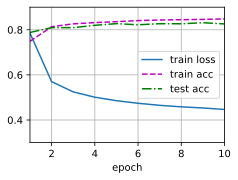

In [43]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
!pip install skorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 155 kB 5.4 MB/s 


In [ ]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Preprocesing
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Dataset
from sklearn.datasets import fetch_lfw_people

# Models
from sklearn.decomposition import PCA
import sklearn.manifold as manifold
import sklearn.linear_model as lm
import sklearn.svm as svm
from sklearn.neural_network import MLPClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier

# Pytorch Models
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
import skorch

# Use [skorch](https://github.com/skorch-dev/skorch). Install:
# `conda install -c conda-forge skorch`

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Plot a gallery of portraits."""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(min(images.shape[0], n_row * n_col)):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


def title(y_pred, y_test, target_names, i):
    """Plot the result of the prediction on a portion of the test set."""
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


def label_proportion(x, decimals=2):
    """Labels's proportions."""
    unique, counts = np.unique(x, return_counts=True)
    return dict(zip(unique, np.round(counts / len(x), decimals)))

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


#### Split into a training and testing set in stratified way

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y)

print({target_names[lab]: prop for lab, prop in
       label_proportion(y_train).items()})

{'Ariel Sharon': 0.06, 'Colin Powell': 0.18, 'Donald Rumsfeld': 0.09, 'George W Bush': 0.41, 'Gerhard Schroeder': 0.08, 'Hugo Chavez': 0.05, 'Tony Blair': 0.11}


In [ ]:
!pip install matplotlib==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires matplotlib!=3.0.0,>=2.0.2, but you have matplotlib 3.0.0 which is incompatible.
scikit-image 0.18.3 requires matplotlib!=3.0.0,>=2.0.0, but you have matplotlib 3.0.0 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.0 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.0 which is incompatible.
d2l 0.17.5 requires matplotlib==3.5.1, but you have matplotlib 3.0.0 which is incompatible.
albu

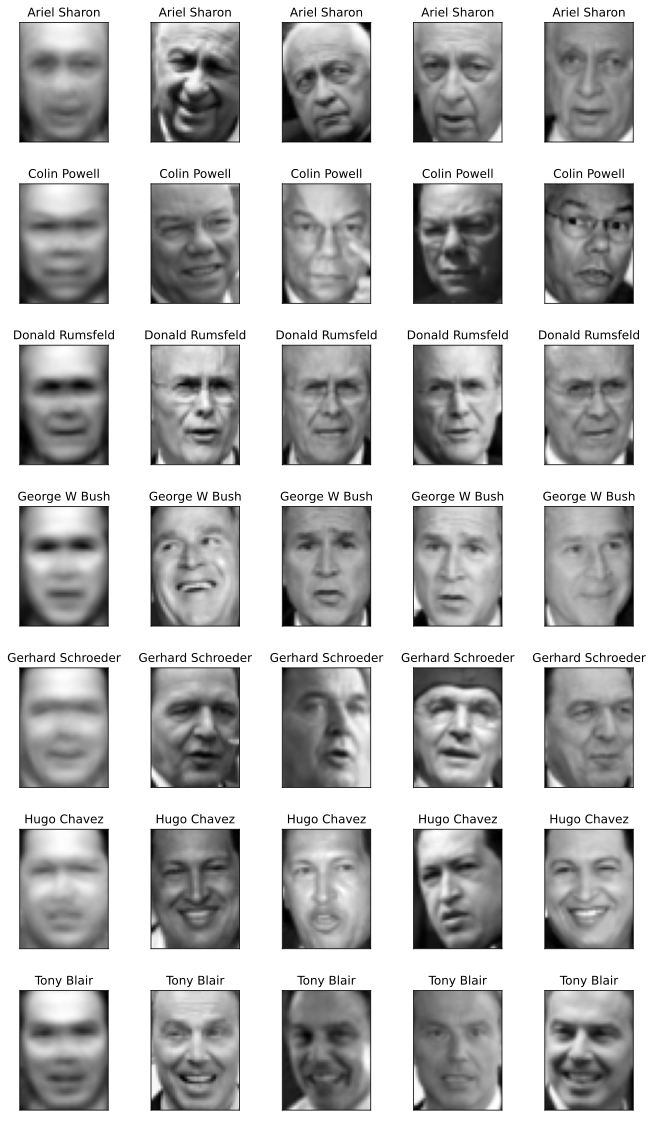

In [ ]:
single_faces = [X_train[y_train == lab][:5] for lab in np.unique(y_train)]
single_faces = np.vstack(single_faces).reshape((5 * n_classes, h, w))

mean_faces = [X_train[y_train == lab].mean(axis=0) for lab in
              np.unique(y_train)]
mean_faces = np.vstack(mean_faces).reshape((n_classes, h, w))

single_faces[::5, :, :] = mean_faces
titles = [n for name in target_names for n in [name] * 5]
plot_gallery(single_faces, titles, h, w, n_row=n_classes, n_col=5)

#### Eigenfaces


In [ ]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Explained variance", pca.explained_variance_ratio_[:2])

Extracting the top 150 eigenfaces from 966 faces
done in 0.596s
Explained variance [0.18892345 0.15293398]


#### T-SNE

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_train)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Projecting the input data on the eigenfaces orthonormal basis


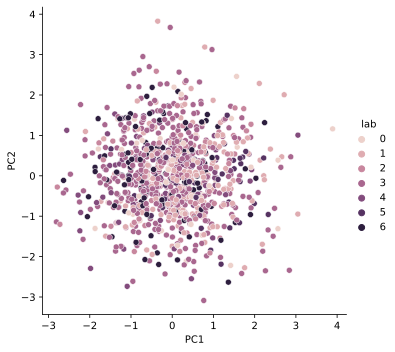

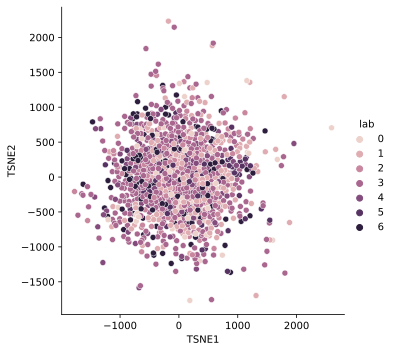

In [ ]:
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
df = pd.DataFrame(dict(lab=y_train,
                       PC1=X_train_pca[:, 0],
                       PC2=X_train_pca[:, 1],
                       TSNE1=X_tsne[:, 0],
                       TSNE2=X_tsne[:, 1]))

sns.relplot(x="PC1", y="PC2", hue="lab", data=df)

sns.relplot(x="TSNE1", y="TSNE2", hue="lab", data=df)

Plot eigenfaces: 

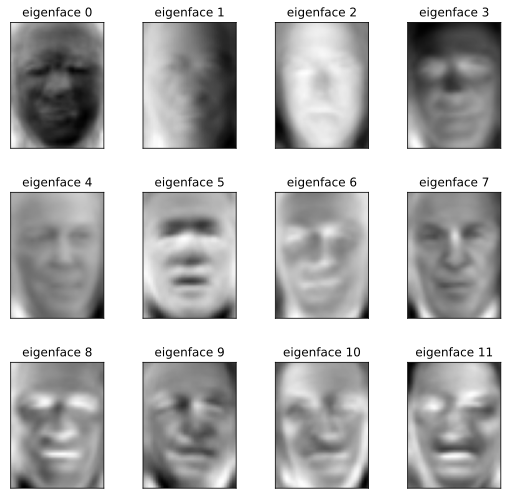

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

#### Logistic Regression with L2 penalty (with CV-based model selection)

 Our goal is to obtain a good balanced accuracy, ie, the macro average (macro avg) of classes’ reccalls. In this perspective, the good practices are:

Scale input features using either StandardScaler() or MinMaxScaler() “It doesn’t harm”.

Re-balance classes’ contributions class_weight=’balanced’

Do not include an intercept (fit_intercept=False) in the model. This should reduce the global accuracy weighted avg. But rememember that we decided to maximize the balanced accuracy.

In [ ]:
lrl2_cv = make_pipeline(
    preprocessing.StandardScaler(),
    # preprocessing.MinMaxScaler(),  # Would have done the job either
    GridSearchCV(lm.LogisticRegression(max_iter=1000, class_weight='balanced',
                                       fit_intercept=False),
                 {'C': 10. ** np.arange(-3, 3)},
                 cv=5, n_jobs=5))

t0 = time()
lrl2_cv.fit(X=X_train, y=y_train)
print("done in %0.3fs" % (time() - t0))
print("Best params found by grid search:")
print(lrl2_cv.steps[-1][1].best_params_)

y_pred = lrl2_cv.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

done in 48.511s
Best params found by grid search:
{'C': 1.0}
                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.89      0.71        19
     Colin Powell       0.91      0.83      0.87        59
  Donald Rumsfeld       0.71      0.80      0.75        30
    George W Bush       0.91      0.80      0.86       133
Gerhard Schroeder       0.70      0.78      0.74        27
      Hugo Chavez       0.62      0.56      0.59        18
       Tony Blair       0.71      0.83      0.77        36

         accuracy                           0.80       322
        macro avg       0.74      0.79      0.75       322
     weighted avg       0.82      0.80      0.80       322

[[ 17   0   1   0   0   1   0]
 [  2  49   3   3   0   0   2]
 [  3   0  24   1   0   1   1]
 [  7   3   4 107   5   3   4]
 [  0   0   1   0  21   1   4]
 [  0   2   0   3   2  10   1]
 [  0   0   1   3   2   0  30]]


#### coefficients

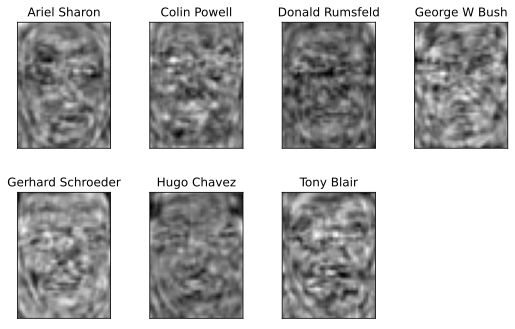

In [ ]:
coefs = lrl2_cv.steps[-1][1].best_estimator_.coef_
coefs = coefs.reshape(-1, h, w)
plot_gallery(coefs, target_names, h, w)

#### SVM (with CV-based model selection)

In [ ]:
svm_cv = make_pipeline(
    # preprocessing.StandardScaler(),
    preprocessing.MinMaxScaler(),
    GridSearchCV(svm.SVC(class_weight='balanced'),
                 {'kernel': ['poly', 'rbf'], 'C': 10. ** np.arange(-2, 3)},
                 # {'kernel': ['rbf'], 'C': 10. ** np.arange(-1, 4)},
                 cv=5, n_jobs=5))

t0 = time()
svm_cv.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best params found by grid search:")
print(svm_cv.steps[-1][1].best_params_)

y_pred = svm_cv.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

done in 53.685s
Best params found by grid search:
{'C': 0.1, 'kernel': 'poly'}
                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.89      0.79        19
     Colin Powell       0.84      0.88      0.86        59
  Donald Rumsfeld       0.76      0.87      0.81        30
    George W Bush       0.90      0.89      0.90       133
Gerhard Schroeder       0.77      0.74      0.75        27
      Hugo Chavez       0.90      0.50      0.64        18
       Tony Blair       0.82      0.78      0.80        36

         accuracy                           0.84       322
        macro avg       0.82      0.79      0.79       322
     weighted avg       0.85      0.84      0.84       322



#### MLP with sklearn and CV-based model selection
Default parameters: - alpha, default=0.0001 L2 penalty (regularization term) parameter. - batch_size=min(200, n_samples) - learning_rate_init = 0.001 (the important one since we uses adam) - solver default=’adam’

sgd: momentum=0.9

adam: beta_1, beta_2 default=0.9, 0.999 Exponential decay rates for the first and second moment.

L2 penalty (regularization term) parameter, alpha default=0.0001

tol, default=1e-4



In [ ]:
mlp_param_grid = {"hidden_layer_sizes":
                  # Configurations with 1 hidden layer:
                  [(100, ), (50, ), (25, ), (10, ), (5, ),
                   # Configurations with 2 hidden layers:
                   (100, 50, ), (50, 25, ), (25, 10, ), (10, 5, ),
                   # Configurations with 3 hidden layers:
                   (100, 50, 25, ), (50, 25, 10, ), (25, 10, 5, )],
                  "activation": ["relu"], "solver": ["adam"], 'alpha': [0.0001]}

mlp_cv = make_pipeline(
    # preprocessing.StandardScaler(),
    preprocessing.MinMaxScaler(),
    GridSearchCV(estimator=MLPClassifier(random_state=1, max_iter=400),
                 param_grid=mlp_param_grid,
                 cv=5, n_jobs=5))

t0 = time()
mlp_cv.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best params found by grid search:")
print(mlp_cv.steps[-1][1].best_params_)

y_pred = mlp_cv.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

#### MLP with pytorch and no model selection

In [ ]:
class SimpleMLPClassifierPytorch(nn.Module):
    """Simple (one hidden layer) MLP Classifier with Pytorch."""

    def __init__(self):
        super(SimpleMLPClassifierPytorch, self).__init__()

        self.dense0 = nn.Linear(1850, 100)
        self.nonlin = nn.ReLU()
        self.output = nn.Linear(100, 7)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        X = self.softmax(self.output(X))
        return X


mlp = NeuralNetClassifier(  # Match the parameters with sklearn
    SimpleMLPClassifierPytorch,
    criterion=torch.nn.NLLLoss,
    max_epochs=100,
    batch_size=200,
    optimizer=torch.optim.Adam,
    # optimizer=torch.optim.SGD,
    optimizer__lr=0.001,
    optimizer__betas=(0.9, 0.999),
    optimizer__eps=1e-4,
    optimizer__weight_decay=0.0001,  # L2 regularization
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    device=device,
    verbose=0)

scaler = preprocessing.MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

t0 = time()
mlp.fit(X_train_s, y_train)
print("done in %0.3fs" % (time() - t0))

y_pred = mlp.predict(X_test_s)
print(classification_report(y_test, y_pred, target_names=target_names))

#### Univariate feature filtering (Anova) with Logistic-L2

In [ ]:
anova_l2lr = Pipeline([
    ('standardscaler', preprocessing.StandardScaler()),
    ('anova', SelectKBest(f_classif)),
    ('l2lr', lm.LogisticRegression(max_iter=1000, class_weight='balanced',
                                   fit_intercept=False))
])

param_grid = {'anova__k': [50, 100, 500, 1000, 1500, X_train.shape[1]],
              'l2lr__C': 10. ** np.arange(-3, 3)}
anova_l2lr_cv = GridSearchCV(anova_l2lr, cv=5,  param_grid=param_grid,
                             n_jobs=5)

t0 = time()
anova_l2lr_cv.fit(X=X_train, y=y_train)
print("done in %0.3fs" % (time() - t0))

print("Best params found by grid search:")
print(anova_l2lr_cv.best_params_)

y_pred = anova_l2lr_cv.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

PCA with LogisticRegression with L2 regularization

In [ ]:
pca_lrl2_cv = make_pipeline(
    PCA(n_components=150, svd_solver='randomized', whiten=True),
    GridSearchCV(lm.LogisticRegression(max_iter=1000, class_weight='balanced',
                                       fit_intercept=False),
                 {'C': 10. ** np.arange(-3, 3)},
                 cv=5, n_jobs=5))

t0 = time()
pca_lrl2_cv.fit(X=X_train, y=y_train)
print("done in %0.3fs" % (time() - t0))

print("Best params found by grid search:")
print(pca_lrl2_cv.steps[-1][1].best_params_)

y_pred = pca_lrl2_cv.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))